<a href="https://colab.research.google.com/github/pseeej/SmartSystemsSoftware/blob/master/BigdataAnalysisInBiz/10%EC%A3%BC%EC%B0%A8_%EB%85%B9%ED%99%94_%EB%B0%8F_%EC%8B%A4%EC%8B%9C%EA%B0%84_%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터마이닝 프로세스**

> *  1.데이터마이닝 프로젝트의 목적을 정확히 설정
> *  2.분석에 필요한 데이터의 획득 (데이터 수집)
> *  3.데이터의 탐색, 정제, 전처리 (이상치, 결측치 처리 등)
> *  4.필요시 데이터 축소 (변수 제거, 변수 값의 변환)
> *  5.데이터마이닝 문제 결정 (분류, 예측, 군집 등)
> *  6.데이터 분할 (지도학습의 경우 - 학습데이터, 검증데이터, 평가데이터)
> *  7.사용할 데이터마이닝 기법 선택 (회귀분석, 인공신경망, 계층군집 등등)
> *  8.알고리즘을 사용하여 과제를 수행 (데이터마이닝 프로세스의 여러 단계를 반복적으로 수행)
> *  9.알고리즘 결과의 해석
> *  10.모델적용(구축된 모델을 운용시스템에 탑재하여 활용)

# **10.1 데이터 전처리란 무엇인가?**

## **10.1.1 데이터의 기본 구조**



*   데이터는 기본적으로 관측치와 변수들로 구성되어 있음



In [1]:
#파이썬 패키지 로드
%matplotlib inline
from pathlib import Path
import os
import calendar
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix, parallel_coordinates
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

**웨스트 록스베리 주택 가격 실습데이터**
> *  (반응변수)TOTAL_VALUE : 주택가격(단위: 1,000달러)
> *  TAX : 세금, 주택가격에 세율을 곱한 값에 근거한 세금 계산서 금액(단위: 달러)
> *  LOT_SQFT : 총 부지 면적(단위: 제곱 피트)
> *  YR_BUILT : 건축 연도
> *  GROSS_AREA : 총 바닥 면적
> *  LIVING_AREA : 주거 공간 총 면적(단위: 제곱 피트)
> *  FLOORS : 층 수
> *  ROOMS : 총 방 수
> *  BEDROOMS : 총 침실 수
> *  FULL_BATH : 총 욕실 개수
> *  HALF_BATH : 총 보조욕실 개수
> *  KITCHEN : 총 주방 개수
> *  FIREPLACE : 총 벽난로 개수
> *  REMODEL : 언제 리모델링을 했는지(최근/오래전/안 함)

In [2]:
#보스턴시에서 공개한 웨스트 록스베리 주택 가격 실습데이터 다운로드
import gdown

url = 'https://drive.google.com/uc?id=1yYHWZDMildHPFL4I4f7hhJd8BMDr5MRn'
output = 'WestRoxbury.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yYHWZDMildHPFL4I4f7hhJd8BMDr5MRn
To: /content/WestRoxbury.csv
100%|██████████| 298k/298k [00:00<00:00, 37.2MB/s]


'WestRoxbury.csv'

In [3]:
#다운로드 받은 csv 파일 불러오기
housing_df = pd.read_csv('WestRoxbury.csv')

In [4]:
#관측치와 변수확인
#5,000여개의 주택 관측치와 14개의 변수를 포함 
#반응변수(TOTAL_VALUE)
housing_df.shape

(5802, 14)

In [5]:
#공백이 있는 변수명 변경하기
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [6]:
#공백이 있는 변수명 모두 변경하기(참고)
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [7]:
#관측치 10개 조회하기
housing_df.head(10)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,None
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,None
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,Recent
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,None


In [9]:
#반응변수 요약하기
# describe는 요약하는 함수인가봥
housing_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [10]:
#변수 전체 요약하기
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## **10.1.2 데이터베이스로부터 샘플링**

*  많은 경우 모델 구축 시 모든 관측치를 사용하지는 않음
*  보통 컴퓨터용량과 소프트웨어 자체 한계와 관련이 있을 수 있음
*  적은 데이터로도 모든 데이터를 사용했을 때와 비슷한 효과를 볼 수 있다면 최대한 적은 양의 데이터를 사용하는 것이 계산 속도 면에서 훨씬 효과적임

In [11]:
#데이터 샘플링
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
2696,285.7,3594,7475,1955,1882,861,1.0,6,3,1,1,1,0,None
3498,328.9,4137,4000,1934,2122,1318,2.0,6,3,1,1,1,1,None
503,220.4,2772,2644,1920,1730,1063,2.0,6,3,1,1,1,0,None
415,259.1,3259,5273,1945,2796,1155,1.0,6,2,1,0,1,1,None
3426,443.3,5576,8492,1900,4829,2680,2.0,10,5,1,1,1,1,None


## **10.1.3 데이터 전처리와 데이터 정제**

### **변수의 종류**
*  연속형 번수 : 실수, 정수
*  범주형 번수 : 숫자 혹은 문자로 표현함
> *  명목형 변수 : 특별히 순위가 없는 경우
> *  순서형 변수 : 큰 값, 작은 값 등 순위로 표현할 수 있는 경우

In [12]:
#변수 확인
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [13]:
#변수 타입 확인
housing_df.dtypes

TOTAL_VALUE    float64
TAX              int64
LOT_SQFT         int64
YR_BUILT         int64
GROSS_AREA       int64
LIVING_AREA      int64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

### **범주형 변수의 처리**
*  범주형 변수 값에 순위가 있는 경우는 연속형 변수로 간주함
*  범주에 순위가 없을 경우에는 범주를 가변수로 바꿔서 사용함

In [14]:
# REMODEL 범주 수 확인
housing_df.groupby("REMODEL").size()

REMODEL
None      4346
Old        581
Recent     875
dtype: int64

In [16]:
#REMODEL 가변수 생성 ('REMODEL_Old', 'REMODEL_Recent')
# 위에서 REMODEL로 groupby를 했기 때문에 이렇게가 가능한가봐
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [17]:
#'REMODEL_Old', 'REMODEL_Recent' 관측치 5개 조회하기
housing_df[['REMODEL_Old', 'REMODEL_Recent']].head(5)

,REMODEL_Old,REMODEL_Recent
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


### **변수선택 (-> 10.3 차원축소)**
*  모델 구축 시 무작정 많은 변수를 사용하는 것이 항상 더 나은 결과를 보장하지는 않음
*  신뢰성이 높은 모델을 구축하기 위해서는 꼭 필요한 변수만을 사용하는 것이 바람직함
*  너무 많은 변수는 미래값을 예측하는 데 있어 많은 데이터가 필요함

### **얼마나 많은 변수와 관측치가 필요한가?**
*  가장 간단한 방법 변수당 10개의 관측치로 적정 관측치의 개수를 정함
*  분류 문제에서 6 x m(클래스 수) x p(변수의 개수)로 계산함	(Delmaster & Hancock, 2001)
*  훌륭한 모델은 간결해야 하며 꼭 필요한 변수만을 사용하는 것이 중요함
*  (실질적인 어려움) 변수의 포함여부를 결정할 때 도메인 지식을 반영해야 모델의 정확도를 높이고 오차를 줄일 수 있음 
> *  배달음식의 총 구매액을 예측하는 문제에서 x1, x2, x3, … 등의 예측변수가 존재한다고 가정했을 때 x1이 배달비용이라면 중요한 변수가 될 수 있으나 배달비용은 최종 거래가 끝나야 알 수 있으므로 사용이 어려움 


### **이상치 (-> 10.2.2 박스플롯)**
*  측정오류나 잘못된 입력으로 인해 이상치가 포함될 수 있음
*  이상치를 처리하지 않은 채 구축된 모델은 정확한 결과를 낼 수 없음
*  기존 데이터들로 멀리 떨어진 데이터를 이상치라고 함 (이상치 결정기준은 임의적)
*  통상 '평균적으로부터 표준편차의 세 배가 넘는 범위의 데이터'를 이상치로 보기도 함
*  통계기법은 이상치의 후보를 제공하는 역할이며, 최종 이상치 판정은 실무자들이 하는 것이 바람직함

### **결측치**
*  일반적으로 데이터에는 결측치가 포함됨
*  결측치가 몇 개 없다면 이들을 삭제하고 분석할 수 있음(너무 많으면 분석이 어려움)
*  결측치를 다른 관측치의 해당값들을 기반으로 대체할 수 있음
> *  예) 가족 구성원의 수입 -> 가족 구성원의 수입의 평균값
> *  분산이 작아지는 문제가 있지만 최종 성능은 검증데이터를 이용하여 검증
> *  주로 중앙값(예 정수형태), 평균값을 사용함
* 결측치가 너무 많을 경우 변수의 중요도를 측정하여 변수를 삭제함
* 근본적인 방법은 시간과 돈을 투자해서 실제값을 얻음

In [20]:
#결측치수 확인
# 결과로 나온 값이 다 똑같으니깐 뭐 잘못된 값은 없다고 볼 수 있지!
housing_df.count()

TOTAL_VALUE       5802
TAX               5802
LOT_SQFT          5802
YR_BUILT          5802
GROSS_AREA        5802
LIVING_AREA       5802
FLOORS            5802
ROOMS             5802
BEDROOMS          5802
FULL_BATH         5802
HALF_BATH         5802
KITCHEN           5802
FIREPLACE         5802
REMODEL_Old       5802
REMODEL_Recent    5802
dtype: int64

In [21]:
#housing_df copy
tmp_housing_df = housing_df.copy()

In [24]:
#결측치 10개 임의 생성
# missingRows로 임의의 index들을 구해와
# .loc에서 BEDROOMS의 missingRows 값들을 np.nan으로 변경
missingRows = tmp_housing_df.sample(10).index
tmp_housing_df.loc[missingRows, 'BEDROOMS'] = np.nan

In [25]:
#결측치 10개 임의 생성 결과 확인
tmp_housing_df.count()

TOTAL_VALUE       5802
TAX               5802
LOT_SQFT          5802
YR_BUILT          5802
GROSS_AREA        5802
LIVING_AREA       5802
FLOORS            5802
ROOMS             5802
BEDROOMS          5782
FULL_BATH         5802
HALF_BATH         5802
KITCHEN           5802
FIREPLACE         5802
REMODEL_Old       5802
REMODEL_Recent    5802
dtype: int64

In [27]:
# 결측치가 있는 관측치 제거
# 전체적으로 값을 맞춰주기 위해서 nan이 있는 행을 지워줌
reduced_df = tmp_housing_df.dropna()
reduced_df.count()

TOTAL_VALUE       5782
TAX               5782
LOT_SQFT          5782
YR_BUILT          5782
GROSS_AREA        5782
LIVING_AREA       5782
FLOORS            5782
ROOMS             5782
BEDROOMS          5782
FULL_BATH         5782
HALF_BATH         5782
KITCHEN           5782
FIREPLACE         5782
REMODEL_Old       5782
REMODEL_Recent    5782
dtype: int64

In [29]:
# 결측치 중위수 대체
# 그냥 nan으로 채워져있던 값들을 임의로 해당 열? type의 중위수로 채워줌
medianBedrooms = tmp_housing_df['BEDROOMS'].median()
tmp_housing_df.BEDROOMS = tmp_housing_df.BEDROOMS.fillna(value=medianBedrooms)
tmp_housing_df.count()

TOTAL_VALUE       5802
TAX               5802
LOT_SQFT          5802
YR_BUILT          5802
GROSS_AREA        5802
LIVING_AREA       5802
FLOORS            5802
ROOMS             5802
BEDROOMS          5802
FULL_BATH         5802
HALF_BATH         5802
KITCHEN           5802
FIREPLACE         5802
REMODEL_Old       5802
REMODEL_Recent    5802
dtype: int64

### **데이터 정규화(표준화) 및 리스케일링**
*  몇몇 알고리즘은 신뢰성 있는 결과를 얻기 위해 데이터의 정규화 작업이 필수적임
*  정규화(z-score) : 각 관측치에서 해당 변수의 평균값을 빼주고 표준편차값으로 나누어 줌
*  정규화는 변수의 스케일을 동일하게 맞추어 주는 하나의 표준화 방법
*  또 다른 방법은 모든 변수를[0,1]의 스케일로 바꾸어 주는 방법
> *  예) 주문금액 : 200,000원 , 주문횟수: 10회라면 변수의 단위 차이 때문에 군집분석에서 평균과의 거리를 계산할 때 주문금액이 전체 거리계산을 지배할 수 있음

In [30]:
#housing_df copy
df = housing_df.copy()

In [32]:
# 데이터 정규화 (z-score)
# (원래 값 - 평균) / 표준편차
norm_df = (housing_df - housing_df.mean()) / housing_df.std()
norm_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,-0.488879,-0.488507,1.381019,-1.576690,-0.552998,-0.564458,0.710905,-0.691980,-0.271783,-0.568528,0.723202,-0.124803,-1.309337,-0.33356,-0.421381
1,0.200795,0.200789,0.116835,0.229372,0.207196,0.590121,0.710905,2.090325,0.909403,1.347035,0.723202,-0.124803,-1.309337,-0.33356,2.372738
2,-0.631048,-0.631176,0.457697,-1.298834,-0.713635,-0.529303,0.710905,0.699173,0.909403,-0.568528,0.723202,-0.124803,-1.309337,-0.33356,-0.421381
3,1.067927,1.068020,2.807392,0.562799,2.383704,1.759502,-1.536872,1.394749,2.090589,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
4,-0.616932,-0.616749,-0.478735,-0.743123,-0.627660,-0.405334,0.710905,0.003597,-0.271783,1.347035,-1.150021,-0.124803,-1.309337,-0.33356,-0.421381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.122148,0.122241,0.181262,0.034873,-0.374262,0.105345,0.710905,1.394749,-0.271783,1.347035,0.723202,-0.124803,0.460235,-0.33356,2.372738
5798,0.153405,0.153500,1.172381,0.368300,-0.577886,-0.599614,0.710905,-0.691980,-0.271783,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
5799,0.139289,0.139073,0.344576,1.396366,-0.503224,0.031334,0.710905,0.003597,-0.271783,-0.568528,0.723202,-0.124803,0.460235,-0.33356,-0.421381
5800,-0.846823,-0.846781,0.229207,0.257158,-1.046220,-1.215759,-1.536872,-1.387556,-1.452969,-0.568528,-1.150021,-0.124803,-1.309337,-0.33356,-0.421381


In [33]:
# 데이터 Min Max Scaling (변수를[0,1]의 스케일로 바꾸어 주는 방법)
rescaled_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())
rescaled_df

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,0.214953,0.215015,0.197472,0.934858,0.220237,0.177220,0.5,0.272727,0.250,0.00,0.333333,0.0,0.00,0.0,0.0
1,0.276420,0.276448,0.123156,0.967181,0.311878,0.307628,0.5,0.636364,0.375,0.25,0.333333,0.0,0.00,0.0,1.0
2,0.202283,0.202300,0.143194,0.939831,0.200873,0.181191,0.5,0.454545,0.375,0.00,0.333333,0.0,0.00,0.0,0.0
3,0.353702,0.353740,0.281323,0.973148,0.574253,0.439707,0.0,0.545455,0.500,0.00,0.333333,0.0,0.25,0.0,0.0
4,0.203541,0.203586,0.088145,0.949776,0.211237,0.195193,0.5,0.363636,0.250,0.25,0.000000,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.269410,0.269448,0.126943,0.963700,0.241784,0.252874,0.5,0.545455,0.250,0.25,0.333333,0.0,0.25,0.0,1.0
5798,0.272196,0.272234,0.185207,0.969667,0.217237,0.173250,0.5,0.272727,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5799,0.270938,0.270948,0.136544,0.988066,0.226238,0.244514,0.5,0.363636,0.250,0.00,0.333333,0.0,0.25,0.0,0.0
5800,0.183052,0.183085,0.129762,0.967678,0.160780,0.103657,0.0,0.181818,0.125,0.00,0.000000,0.0,0.00,0.0,0.0




---



### **데이터 분할**

In [36]:
# 학습데이터(60%), 검증데이터(40%) 생성하기
# trainData는 housing_df에서 랜덤하게 60% 떼오는거고
trainData= housing_df.sample(frac=0.6, random_state=1)
# validData는 housing_df에서 trainData를 뺀 나머지
validData = housing_df.drop(trainData.index)

In [37]:
#학습데이터셋 관측치수 확인
trainData.count()

TOTAL_VALUE       3481
TAX               3481
LOT_SQFT          3481
YR_BUILT          3481
GROSS_AREA        3481
LIVING_AREA       3481
FLOORS            3481
ROOMS             3481
BEDROOMS          3481
FULL_BATH         3481
HALF_BATH         3481
KITCHEN           3481
FIREPLACE         3481
REMODEL_Old       3481
REMODEL_Recent    3481
dtype: int64

In [38]:
#검증데이터셋 관측치수 확인
validData.count()

TOTAL_VALUE       2321
TAX               2321
LOT_SQFT          2321
YR_BUILT          2321
GROSS_AREA        2321
LIVING_AREA       2321
FLOORS            2321
ROOMS             2321
BEDROOMS          2321
FULL_BATH         2321
HALF_BATH         2321
KITCHEN           2321
FIREPLACE         2321
REMODEL_Old       2321
REMODEL_Recent    2321
dtype: int64

In [40]:
# 학습데이터(50%), 검증데이터(30%), 평가데이터(20%) 생성하기
trainData = housing_df.sample(frac=0.5, random_state=1)
# trainData를 뺀 나머지에서 30%
validData = housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# trainData와 validData를 모두 뺀 것들
testData = housing_df.drop(trainData.index).drop(validData.index)

# **10.2 데이터마이닝에서 시각화는 왜 중요한가?**

## **10.2.1 데이터 시각화 용도**

*  "한 장의 사진은 천 마디 말보다 낫다"
> * 복잡한 언어 정보를 간결하고 이해하기 쉬운 이미지로 압축하는 능력을 의미함
*  숫자의 경우 데이터 시각화나 집계표를 만들면 데이터를 탐색하기 매우 용이함
*  결과를 효과적으로 전달함
*  시각화는 주로 데이터마이닝의 전처리 단계에 사용함
*  시각화는 틀린 수치들, 결측치, 중복 행, 중복 열을 등을 찾아 줌으로 써 데이터 정제를 도와줌
*  시각화는 변수 도출과 선택에도 유용함 (어떤 변수들을 분석에 포함할지 어떤 변수가 불필요한지 결정하는 데 도움을 줌)
*  구간의 크기가 적당한지, 수치형 변수들의 구간화가 필요한지 여부를 결정하는데 유용함

## **10.2.2 기본 차트: 막대차트, 선 그래프, 산점도 (2차원)**

*  가장 유용한 차트
*  동시에 하나 또는 두개의 데이터 열을 표시하여 데이터 탐색을 도움
*  데이터분석 초기 단계에서 데이터의 구조, 변수의 양과 유형, 결측값의 크기와 유형 등을 파악하는 데 유용함
*  지도학습 : 결과변수 중심으로 표현. 보통 결과변수가 y축에 할당
*  비지도학습 : 데이터 간의 관계(군집화)를 보여주는 기본 차트(산점도)들이 선호됨

In [41]:
#패키지 로드
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

**보스턴 주택 데이터**
> *  CRIM : 범죄율
> *  ZN : 25,000평방피트 기준 거주지 비율
> *  INDUS : 비소매업종 점유 구역 비율
> *  CHAS : 찰스강 인접 여부(1=인접, 0=비인접)
> *  NOX : 일산화 질소 농도(천만 개당)
> *  RM : 거주지의 평균 방 개수
> *  AGE : 1940년 이전에 건축된 주택에 사는 비율
> *  DIS : 보스턴 5대 사업지구와의 거리
> *  RAD : 고속도로 진입용이성 정도
> *  TAX : 재산세율(10,000달러당)
> *  PTRATIO : 학생 대 교사 비율
> *  LSTAT : 저소득층 비율
> *  (반응)MEDV : 주택가격의 중앙값(단위: 1,000달러)
> *  (반응)CAT_MEDV : 주택가격의 중앙값이 3만 달러 이상 여부(1=이상, 0=이하)


In [42]:
#보스턴 주택 데이터
import gdown

url = 'https://drive.google.com/uc?id=1_FlDFZ4EzJ7dV28HVNE3_Q-YI-2PnvrK'
output = 'BostonHousing.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_FlDFZ4EzJ7dV28HVNE3_Q-YI-2PnvrK
To: /content/BostonHousing.csv
100%|██████████| 32.9k/32.9k [00:00<00:00, 35.3MB/s]


'BostonHousing.csv'

In [43]:
#보스턴 주택 데이터 불러오기
housing_df = pd.read_csv('BostonHousing.csv')

In [44]:
#공백이 있는 변수명 변경하기
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


### **선차트(시간에 따른 변화)**

*  선그래프는 주로 시계열을 보여주기 위해 사용함
*  차트를 그리기 위한 시간 프레임의 크기는 예측과제의 규모와 데이터의 속성에 따라 달라짐

In [45]:
#앰트랙 기차 이용 승객 데이터
import gdown

url = 'https://drive.google.com/uc?id=1OtsyNsHPgJI2a0bDhL5pt83eOpYBkZa4'
output = 'Amtrak.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OtsyNsHPgJI2a0bDhL5pt83eOpYBkZa4
To: /content/Amtrak.csv
100%|██████████| 3.34k/3.34k [00:00<00:00, 7.52MB/s]


'Amtrak.csv'

In [46]:
#앰트랙 기차 이용 승객 데이터 불러오기
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964
...,...,...
154,01/11/2003,2076.054
155,01/12/2003,2140.677
156,01/01/2004,1831.508
157,01/02/2004,1838.006


In [47]:
#시계열 그래프 단위 설정을 위해서 pd.Series 생성
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

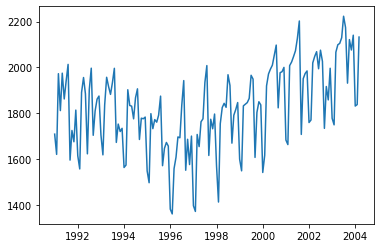

In [48]:
# 선 그래프 그리기
plt.plot(ridership_ts.index, ridership_ts)

### **산점도(수치형 변수 간의 관계)**

*  기본 산점도에서 두 변수는 수치형이어야 함
*  비지도학습에 있어서 산점도는 두 가지 수치형 변수 간의 정보 중복이나 군집 발견과 같은 연관성을 밝히는 데 도움이 됨

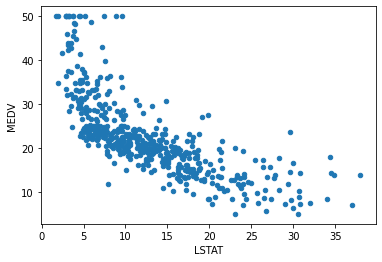

In [49]:
#보스턴 주택 데이터 LSTAT(저소득층 비율), MEDV(주택가격의 중앙값) 산점도 그리기
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

### **막대차트(하위집단 간의 차이점)**

*  평균, 개수, 비율과 같은 단일 통계치를 그룹별로 비교하는 데 유용함
*  막대의 높이는 통계값을 나타냄
*  각 막대는 각 집단을 표시함

In [50]:
# CHAS (찰스강 인접여부)별 변수 평균값 확인하기
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


Text(0, 0.5, 'Avg. MEDV')

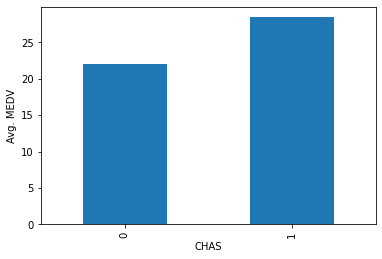

In [51]:
#CHAS(찰스강 인접여부)별 MEDV(주택가격의 중앙값) 그래프
dataForPlot = housing_df.groupby('CHAS').mean()
dataForPlot.MEDV.plot(kind='bar').set_ylabel('Avg. MEDV')

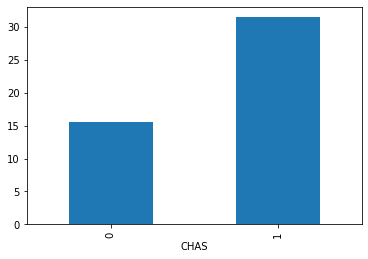

In [52]:
#CHAS(찰스강 인접여부)별 CAT_MEDV(주택가격의 중앙값이 3만 달러 이상 여부) 그래프 
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100 # %단위로 변경
dataForPlot.plot(kind='bar')

### **분포도: 박스플롯과 히스토그램**

*  수치형 변수의 전반적인 분포를 표시해주는 차트
*  평균값이 인기 있고, 용도가 큰 요약 통계이지만, 변수의 중앙값이나 표준편차와 같은 추가적인 통계치를 보게 되면 더 많은 정보를 얻을 수 있고 전체 분포를 관찰한다면 더욱 유용할 수 있음
*  막대차트가 단일 변량을 표시하는 데 사용되는 반면, '박스플롯'과 '히스토그램'은 수치형 변수의 전체 분포를 나타냄
*  여러 개의 '박스플롯'을 시간변화로 비교하거나 하위그룹간 비교하면 분포를 관찰하는 데 유용함
*  히스토그램은 모든 x값의 출현 빈도를 나타냄
*  박스플롯은 y축 위에 그리는 변수를 대표함
*  히스토그램과 박스플롯은 수치형 변수에 적합하게 되어 있으므로 기본적으로 예측과제에 유용함
*  박스플롯도 수치형 변수(y축)와 범주형 변수(x축) 사이의 관계를 표시하여 비지도학습을 지원해 줌
*  박스플롯과 히스토그램은 수치형 변수의 구간을 설정하는 방법을 보여주기 때문에 새로운 변수를 도출하는 데 도움이 됨
*  X축에 범주형 결과값, y축에 수치형 예측변수를 사용한 병렬 박스플롯은 분류과제에서 수치형 변수의 잠재성을 평가하기 좋음


Text(0, 0.5, 'count')

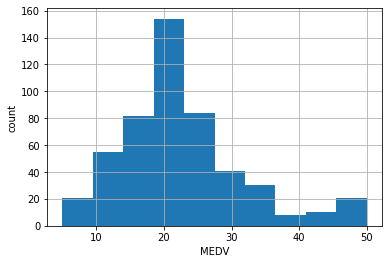

In [53]:
#MEDV(주택가격의 중앙값) 히스토그램
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'MEDV')

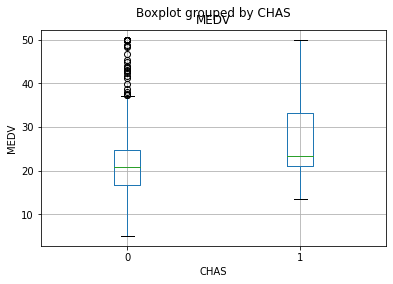

In [54]:
#CHAS(찰스강 인접여부)별 MEDV(주택가격의 중앙값) 박스플롯
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

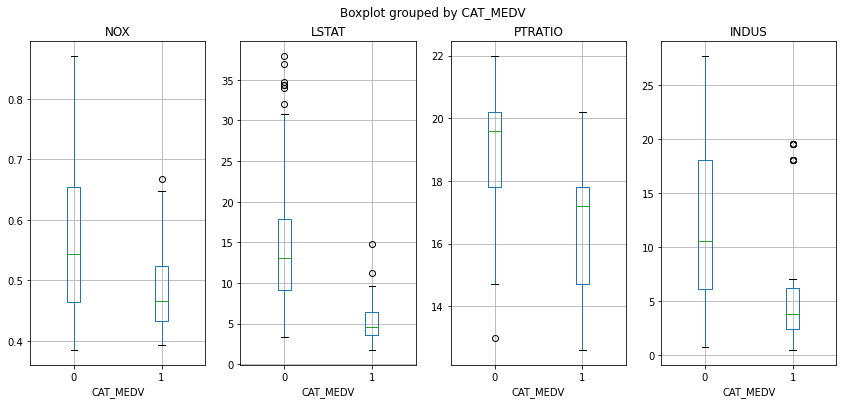

In [55]:
#CAT_MEDV(주택가격의 중앙값이 3만 달러 이상 여부)별 박스플롯
#NOX(일산화 질소 농도) 분포
#LSTAT(저소득층 비율) 분포
#PTRATIO(학생 대 교사 비율) 분포
#INDUS(비소매업종 점유 구역 비율)  분포
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(14, 6)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=ax[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=ax[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=ax[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=ax[3])

plt.show()

### **히트맵: 상관관계와 결측치 시각화**

*  히트맵이란 수치형 데이터를 그래픽으로 나타내는 차트로 주로 색상을 사용하여 값을 나타냄
*  데이터마이닝에서 히트맵은 상관관계 표의 시각화와 결측값의 시각화에 유용함
*  인간의 색상차이 인지한계로 히트맵은 큰 숫자 값을 검토하는 데 유용하지만 막대차트 같이 정확한 그래픽 디스플레이들을 대체할 수 없음
*  상관관계 히트맵에서 색상이 짙을수록 더 강한 상관관계를 의미하기 때문에 높거나 낮은 상관관계를 신속하게 찾을 수 있음


In [56]:
# 보스턴 주택 데이터 상관관계
housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


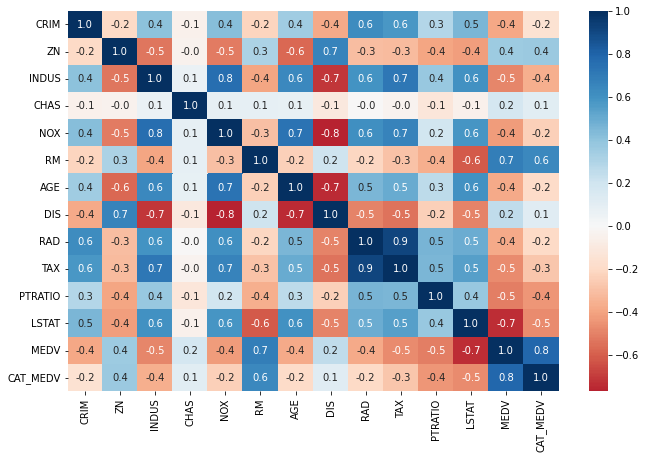

In [57]:
# 보스턴 주택 데이터 상관관계 히트맵
corr = housing_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

# **10.3 차원축소란 무엇인가?**

*  데이터 차원은 변수의 개수로 정해짐
*  모델의 차원은 모델에 의해 사용된 독립변수 또는 입력변수의 개수
*  차원축소 = 요인선택 = 특성추출
*  데이터마이닝 알고리즘을 효율적으로 수행하기 위해서는 변수의 개수를 축소할 필요가 있음
*  상관문제 : 데이터 준비 단계에서 변수의 개수가 늘어남 -> 이변수들 간의 서로 높은 상관관계가 존재할 가능성이 높아짐 -> 모델 과적합 ->모델의 정확도 신뢰도 하락
*  계산문제(차원의 저주) : 지나치게 많은 변수로 계산량 기하급수적 증가

### **차원 축소 접근법**

*  범주를 제거하거나 결합하기 위해서는 주어진 자료와 관련된 특정 분야의 지식을 도입
*  변수 간 중복되는 정보를 검출하기 위해서 자료 요약을 사용함
*  범주형 변수를 수치형 변수로 변환하는 등 자료변환 기술을 사용함
*  주성분 분석(PCA)과 같은 자동화된 차원 축소 (생략)
*  회귀모델, 분류모델, 회귀나무와 같은 데이터마이닝 방법들을 이용한 차원축소 (생략)

## **10.3.1 데이터 요약**

In [58]:
#보스턴 주택 데이터 copy
bostonHousing_df = housing_df.copy()

In [59]:
#보스턴 주택 데이터 관측치 10개 조회하기
bostonHousing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


### **요약 통계량**

*  데이터에 대한 개요를 확인하는 것으로 각 변수의 특징을 학습하는 데 매우 유용함
*  변수가 취하는 값의 스케일과 형태에 관한 정보를 제공함
*  최솟값 최대값은 오류일 가능성이 높은 극단값을 검출함
*  평균과 중앙값 함수는 해당 변수의 중심값에 대한 정보를 제공함
*  평균과 중앙값 사이의 큰 편차는 데이터의 치우침을 암시함

In [60]:
#보스턴 주택 데이터 요약 통계량 describe() 함수
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [61]:
#보스턴 주택 데이터 각각의 함수를 이용하여 데이터 요약하기 (참고)
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


### **취합과 피벗 테이블**

*  하나 또는 여러 개의 변수에 대해 레코드를 취합하고 요약 통계량(빈도수, 평균, 비율 등)을 계산함
*  분류문제에서 예측변수들을 찾을 때 매우 유용함
> *  각 클래스별로 예측변수들의 기술 통계량들을 요약하는 방법

In [63]:
# RM(거주지의 평균 방 개수) 구간화 (CASE WHEN 떠올리기)
# RM 값의 범위?를 알기 위한 것... pd.cut으로 소수점 잘라내기
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, bins=range(0, 10), labels=False)
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


In [64]:
#RM_bin(거주지의 평균 방 개수구간)별, CHAS(찰스강 인접 여부)별 MEDV(주택가격의 중앙값) 계산하기
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [66]:
#RM_bin(거주지의 평균 방 개수구간)별, CHAS(찰스강 인접 여부)별 MEDV(주택가격의 중앙값) 계산하기 (참고)
# 위랑 동일한 결과임
bostonHousing_df.groupby(['RM_bin', 'CHAS']).agg({"MEDV": [np.mean]})

MEDV
                  mean
RM_bin CHAS           
3      0     25.300000
4      0     15.407143
5      0     17.200000
       1     22.218182
6      0     21.769170
       1     25.918750
7      0     35.964444
       1     44.066667
8      0     45.700000
       1     35.950000

In [67]:
#RM_bin(거주지의 평균 방 개수구간)별, CHAS(찰스강 인접 여부)별 MEDV(주택가격의 중앙값) 값 형태로 데이터 변환하기 (참고)
mlt = pd.melt(bostonHousing_df, id_vars=['RM_bin', 'CHAS'], 
              value_vars=['MEDV'])
mlt.head()

,RM_bin,CHAS,variable,value
0,6,0,MEDV,24.0
1,6,0,MEDV,21.6
2,7,0,MEDV,34.7
3,6,0,MEDV,33.4
4,7,0,MEDV,36.2


In [68]:
#RM_bin(거주지의 평균 방 개수구간)별, CHAS(찰스강 인접 여부)별 MEDV(주택가격의 중앙값) 평균값 계산하기
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [69]:
#sql비교 (참고)
from sqlalchemy import create_engine #패키지 내 특정함수
engine = create_engine('sqlite:///:memory:')
bostonHousing_df.to_sql('bostonHousing_df', engine)

In [70]:
#sql (참고)
pd.read_sql(f"""
SELECT RM_bin, CHAS, avg(MEDV)
FROM bostonHousing_df
GROUP BY 1,2;
"""
, engine)

,RM_bin,CHAS,avg(MEDV)
0,3,0,25.300000
1,4,0,15.407143
2,5,0,17.200000
3,5,1,22.218182
4,6,0,21.769170
5,6,1,25.918750
6,7,0,35.964444
7,7,1,44.066667
8,8,0,45.700000
9,8,1,35.950000


## **10.3.2 상관분석**

*  많은 수의 변수가 있는 데이터세트에서 변수들 간의 중복을 찾을 수 있는 간단한 방법
*  매우 강한 (양의 또는 음의) 상관이 있는 변수 쌍은 정보의 많은 부분이 겹치게 되어, 이들 변수 중 하나를 제거함으로써 데이터 축소를 할 수 있음


In [72]:
# 보스턴 주택 데이터 상관관계
# .corr로 피어슨 상관계수 계산함. round로는 반올림
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15,-0.22
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37,0.27
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37,-0.36
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11,0.07
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23,-0.26
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64,0.92
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19,-0.20
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12,0.18
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20,-0.19
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27,-0.26


## **10.3.3 범주형 변수의 범주 개수 축소**

*  범주형 변수가 예측변수인 경우 다수의 가변수로 변환을 하게 됨
*  M개의 범주를 갖는 예측변수는 분석법에 따라 m또는 m-1개의 가변수로 변환됨
*  매우 적은 수의 범주형 변수가 데이터세트의 차원을 크게 늘릴 수 있음
*  해결방법은 가깝거나 유사한 범주들을 하나로 합침으로써 범주의 수를 줄이는 것임
*  범주를 합칠 경우 전문가의 지식이 요구됨
*  관측치 개수가 적은 범주들은 다른 범주와 결합하기에 좋은 후보가 됨
*  분석과 가장 관련이 있는 범주들만 사용하고 나머지 범주들은 '기타'로 병합

In [73]:
# 보스턴 주택 데이터 ZN(25,000평방피트 기준 거주지 비율)별 CAT_MEDV(주택가격의 중앙값이 3만 달러 이상 여부) 관측치 수
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)
tbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,33.0,34.0,35.0,40.0,45.0,52.5,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,2,2,2,3,1,3,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,2,1,1,4,5,0,1,1,0,2,5,1,0,5,4,1


In [74]:
# 보스턴 주택 데이터 ZN(25,000평방피트 기준 거주지 비율)별 CAT_MEDV(주택가격의 중앙값이 3만 달러 이상 여부) 관측치 수 비율(%)
propTbl = tbl / tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,33.0,34.0,35.0,40.0,45.0,52.5,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,0.5,0.67,0.67,0.43,0.17,1.0,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,0.5,0.33,0.33,0.57,0.83,0.0,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


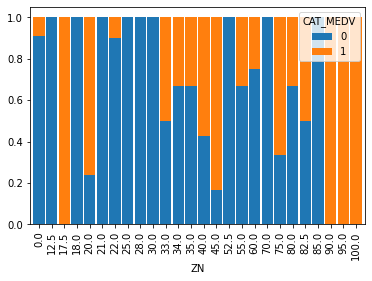

In [75]:
# 시각화를 통한 범주 개수 축소
#17.5, 90.0, 95.0, 100.0 그룹
#12.5, 18.0, 21.0, 25.0, 28.0, 30.0, 52.5, 70.0 그룹
#그외 기타 그룹
propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)

## **10.3.4 범주형 변수에서 수치형 변수로의 변환**

*  범주형 변수의 범주들은 때때로 구간을 나타냄
*  예: 나이 범주 2가 20-30인 경우 범주형 값(2)을 구간의 중간값(25)로 대체함 